In [1]:
import cv2

In [30]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 10 hours 43 mins
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.4
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_Sami_9ak2i7
H2O cluster total nodes:,1
H2O cluster free memory:,1.633 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [33]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline


In [35]:
diabetic_df = h2o.import_file("C:\\Users\Sami\Documents\diabetescsv\diabetes.csv")



Parse progress: |█████████████████████████████████████████████████████████| 100%


268.0


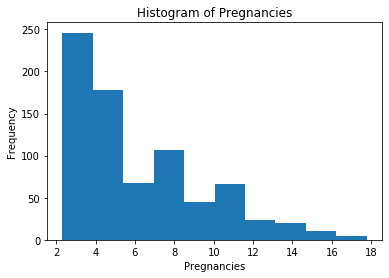

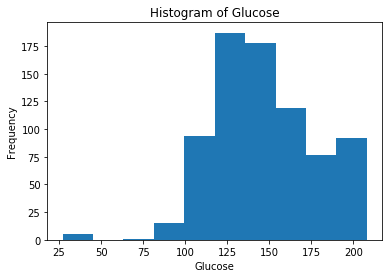

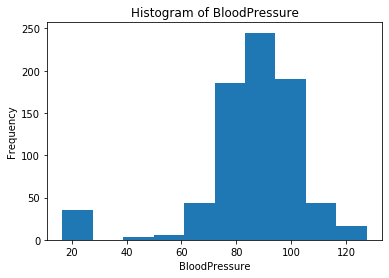

In [ ]:
print(diabetic_df['Outcome'].sum())
for col in diabetic_df.columns:
    diabetic_df[col].hist()

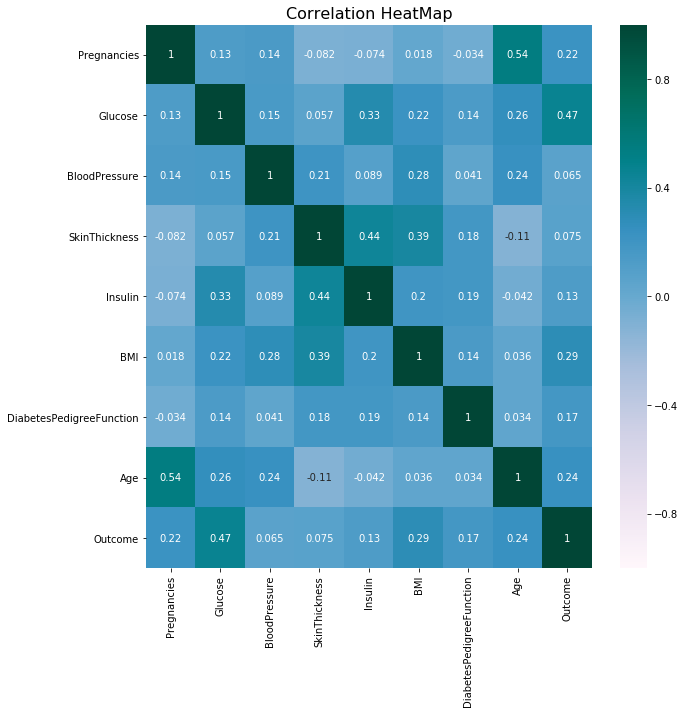

In [51]:
# plot the correlation map between the data variable
plt.figure(figsize=(10,10))
corr = diabetic_df.cor().as_data_frame()
corr.index = diabetic_df.columns
sns.heatmap(corr, annot = True, cmap='PuBuGn', vmin=-1, vmax=1)
plt.title("Correlation HeatMap", fontsize=16)
plt.show()



In [41]:
#split the data into 60% for training and the rest for validation and testing
train, valid, test = diabetic_df.split_frame(ratios=[0.6, 0.2], seed = 1234)

In [42]:
## for binary classification, response should be a factor (ordinal / category)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

In [43]:
#print the test dataset to ensure the number of columns and data is ok
print(test)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,89,66,23,94,28.1,0.167,21,0
8,125,96,0,0,0,0.232,54,1
5,166,72,19,175,25.8,0.587,51,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,147,76,0,0,39.4,0.257,43,1
5,117,92,0,0,34.1,0.337,38,0


In [44]:
# exclude the response which the "Outcome" variable in our dataset
predictors = diabetic_df.columns[:-1]
print (predictors)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [46]:
# train the gradient boosting model
gbm_model = H2OGradientBoostingEstimator()
gbm_model.train(x = predictors, y = response, training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
# get the model summary
print(gbm_model)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1560636781238_1


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
pr_auc: 0.9784923662885114
Gini: 0.9798525204496917
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


,0,1,Error,Rate
0,290.0,9.0,0.0301,(9.0/299.0)
1,14.0,152.0,0.0843,(14.0/166.0)
Total,304.0,161.0,0.0495,(23.0/465.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4622053,0.9296636,150.0
max f2,0.3238256,0.9448357,176.0
max f0point5,0.5480218,0.9673025,132.0
max accuracy,0.5069764,0.9505376,142.0
max precision,0.9838497,1.0,0.0
max recall,0.1733829,1.0,227.0
max specificity,0.9838497,1.0,0.0
max absolute_mcc,0.5069764,0.8920664,142.0
max min_per_class_accuracy,0.3721344,0.9397993,163.0
max mean_per_class_accuracy,0.3704585,0.9458033,164.0


Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107527,0.9647603,2.8012048,2.8012048,1.0,0.9701344,1.0,0.9701344,0.0301205,0.0301205,180.1204819,180.1204819
,2,0.0215054,0.9598415,2.8012048,2.8012048,1.0,0.9634412,1.0,0.9667878,0.0301205,0.0602410,180.1204819,180.1204819
,3,0.0301075,0.9481976,2.8012048,2.8012048,1.0,0.9528239,1.0,0.9627981,0.0240964,0.0843373,180.1204819,180.1204819
,4,0.0408602,0.9440162,2.8012048,2.8012048,1.0,0.9462455,1.0,0.9584422,0.0301205,0.1144578,180.1204819,180.1204819
,5,0.0516129,0.9402434,2.8012048,2.8012048,1.0,0.9422679,1.0,0.9550725,0.0301205,0.1445783,180.1204819,180.1204819
,6,0.1010753,0.9109362,2.8012048,2.8012048,1.0,0.9246690,1.0,0.9401942,0.1385542,0.2831325,180.1204819,180.1204819
,7,0.1505376,0.8685528,2.8012048,2.8012048,1.0,0.8898148,1.0,0.9236410,0.1385542,0.4216867,180.1204819,180.1204819
,8,0.2,0.7970538,2.8012048,2.8012048,1.0,0.8346415,1.0,0.9016303,0.1385542,0.5602410,180.1204819,180.1204819
,9,0.3010753,0.5563266,2.8012048,2.8012048,1.0,0.6801791,1.0,0.8272860,0.2831325,0.8433735,180.1204819,180.1204819
,10,0.4,0.3260873,1.1570194,2.3945783,0.4130435,0.4418483,0.8548387,0.7319627,0.1144578,0.9578313,15.7019382,139.4578313



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-06-23 16:05:46,0.245 sec,0.0,0.4791116,0.6516662,0.5,0.0,1.0,0.6430108
,2019-06-23 16:05:47,1.058 sec,1.0,0.4566016,0.6062100,0.8991115,0.5726834,2.8012048,0.1784946
,2019-06-23 16:05:47,1.194 sec,2.0,0.4371737,0.5688548,0.9180501,0.6699546,2.8012048,0.1548387
,2019-06-23 16:05:47,1.228 sec,3.0,0.4205751,0.5378978,0.9199944,0.6720556,2.8012048,0.1569892
,2019-06-23 16:05:47,1.249 sec,4.0,0.4059872,0.5111693,0.9259379,0.8401345,2.8012048,0.1483871
---,---,---,---,---,---,---,---,---,---
,2019-06-23 16:05:48,2.579 sec,46.0,0.2413702,0.2234642,0.9872064,0.9743236,2.8012048,0.0537634
,2019-06-23 16:05:48,2.587 sec,47.0,0.2406076,0.2224398,0.9873675,0.9746131,2.8012048,0.0537634
,2019-06-23 16:05:48,2.601 sec,48.0,0.2389076,0.2197529,0.9876093,0.9749423,2.8012048,0.0537634
,2019-06-23 16:05:48,2.623 sec,49.0,0.2375624,0.2179044,0.9879720,0.9754953,2.8012048,0.0516129



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Glucose,160.8897247,1.0,0.3861147
BMI,107.1570282,0.6660278,0.2571631
DiabetesPedigreeFunction,49.3825264,0.3069340,0.1185117
Age,28.7894745,0.1789392,0.0690910
BloodPressure,24.5161362,0.1523785,0.0588356
Pregnancies,22.0554619,0.1370843,0.0529303
Insulin,12.9495811,0.0804873,0.0310773
SkinThickness,10.9490166,0.0680529,0.0262762


In [48]:
# inspect how the model is performing on the valid set
perf_valid = gbm_model.model_performance(valid)

In [49]:
print(perf_valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
pr_auc: 0.6269893119126704
Gini: 0.6098645643824541
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


,0,1,Error,Rate
0,53.0,44.0,0.4536,(44.0/97.0)
1,3.0,48.0,0.0588,(3.0/51.0)
Total,56.0,92.0,0.3176,(47.0/148.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1458393,0.6713287,91.0
max f2,0.1125309,0.8199357,106.0
max f0point5,0.6684258,0.6424581,31.0
max accuracy,0.6684258,0.75,31.0
max precision,0.9807389,1.0,0.0
max recall,0.1125309,1.0,106.0
max specificity,0.9807389,1.0,0.0
max absolute_mcc,0.1458393,0.4777695,91.0
max min_per_class_accuracy,0.3285813,0.6862745,64.0
max mean_per_class_accuracy,0.1458393,0.7437841,91.0


Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0135135,0.9730977,1.4509804,1.4509804,0.5,0.9772279,0.5,0.9772279,0.0196078,0.0196078,45.0980392,45.0980392
,2,0.0202703,0.9668724,2.9019608,1.9346405,1.0,0.9723995,0.6666667,0.9756184,0.0196078,0.0392157,190.1960784,93.4640523
,3,0.0337838,0.9523557,2.9019608,2.3215686,1.0,0.9637757,0.8,0.9708814,0.0392157,0.0784314,190.1960784,132.1568627
,4,0.0405405,0.9279944,2.9019608,2.4183007,1.0,0.9398704,0.8333333,0.9657129,0.0196078,0.0980392,190.1960784,141.8300654
,5,0.0540541,0.9231616,1.4509804,2.1764706,0.5,0.9254153,0.75,0.9556385,0.0196078,0.1176471,45.0980392,117.6470588
,6,0.1013514,0.8922442,2.0728291,2.1281046,0.7142857,0.9063491,0.7333333,0.9326368,0.0980392,0.2156863,107.2829132,112.8104575
,7,0.1554054,0.8360014,2.1764706,2.1449275,0.75,0.8618247,0.7391304,0.9080065,0.1176471,0.3333333,117.6470588,114.4927536
,8,0.2027027,0.7225152,1.6582633,2.0313725,0.5714286,0.7730923,0.7,0.8765265,0.0784314,0.4117647,65.8263305,103.1372549
,9,0.3040541,0.5171489,1.5477124,1.8701525,0.5333333,0.6056568,0.6444444,0.7862366,0.1568627,0.5686275,54.7712418,87.0152505
,10,0.3986486,0.4098378,1.0364146,1.6723164,0.3571429,0.4615336,0.5762712,0.7091884,0.0980392,0.6666667,3.6414566,67.2316384
